In [1]:

import pygoko
import numpy as np
from math import pi
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

cmap = plt.get_cmap("jet")
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
numPoints = 90
data = pi * (2 * np.random.rand(numPoints, 1) - 0.5)
data = [np.cos(data).reshape(-1, 1), np.cos(data) * np.sin(data).reshape(-1, 1)]
data = np.concatenate(data, axis=1).astype(np.float32)

In [2]:
tree = pygoko.CoverTree()
tree.set_leaf_cutoff(0)
tree.set_scale_base(2.0)
tree.set_min_res_index(-5)
tree.fit(data)

In [3]:
node_indexes = dict()
for layer in tree.layers():
    for node in layer.nodes():
        node_indexes[node.address()] = len(node_indexes)

In [4]:

def tree_vis(ax):
    patches = []
    lines = []


    for layer in tree.layers():
        point_indexes, center_points = layer.centers()
        for c in center_points:
            patches.append(mpatches.Circle(c, 2**(layer.scale_index()), fill= False, edgecolor="Black", linewidth=2))
        for point_index, c in zip(point_indexes, center_points):
            if not layer.is_leaf(point_index):
                for child in layer.child_points(point_index):
                    lines.append(
                        mlines.Line2D(
                            [c[0], child[0]], [c[1], child[1]], color="black", linewidth=layer.scale_index()+2,
                        )
                    )

            
    ax.set_xlim((-1.6, 1.6))
    ax.set_ylim((-1.2, 1.2))


    collection = PatchCollection(patches, match_original=True)
    #for line in lines:
    #    ax.add_line(line)
    #ax.add_collection(collection)
    ax.scatter(data[:, 0], data[:, 1], color="black", marker= "x")
    #ax.scatter(centers[:, 0], centers[:, 1], color="red")

    ax.axis("off")
    return ax

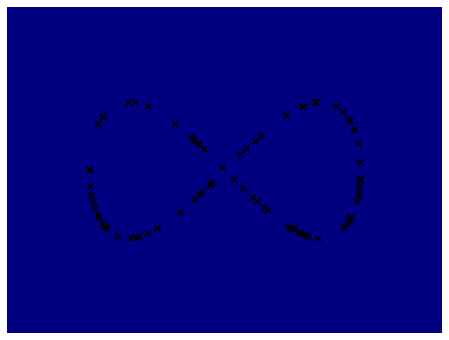

In [10]:
resolution = 2000


def graph_partition(limit, resolution):
    X= np.linspace(-1.6,1.6,resolution, dtype=np.float)
    Y= np.linspace(-1.2,1.2,resolution, dtype=np.float)
    colors = np.zeros([resolution,resolution])
    for i,x in enumerate(Y):
        for j,y in enumerate(X):
            coords = np.array([y,-x], dtype= np.float32)
            path = tree.path(coords)
            if len(path) <= limit: 
                colors[i,j] = node_indexes[path[-1][1]]
            else: 
                colors[i,j] = node_indexes[path[limit][1]]
    fig, ax1 = plt.subplots()
    ax1.imshow(colors, cmap= "gist_ncar", extent = (-1.6,1.6,-1.2,1.2))
    tree_vis(ax1)
    fig.set_size_inches(8,6)
    fig.savefig(f"partition_{limit}.png", bbox_inches="tight", dpi= 1000)
    plt.show()
graph_partition(0, resolution)

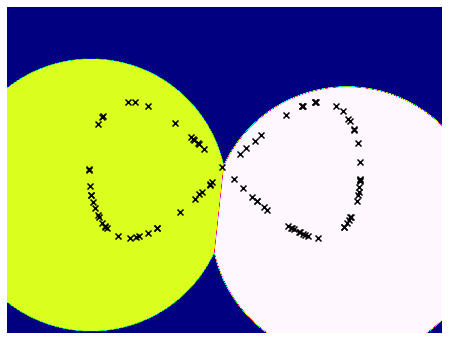

In [11]:
graph_partition(1, resolution)


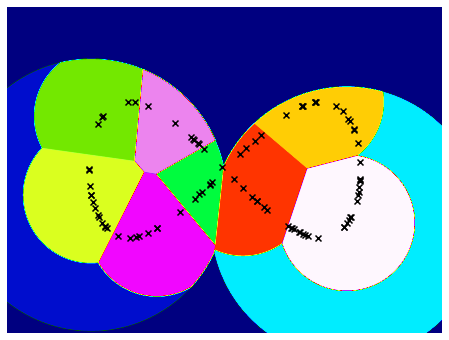

In [12]:
graph_partition(2, resolution)


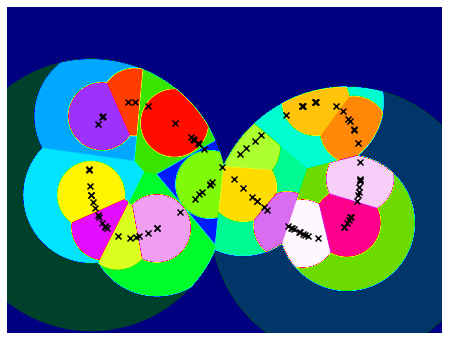

In [13]:
graph_partition(3, resolution)


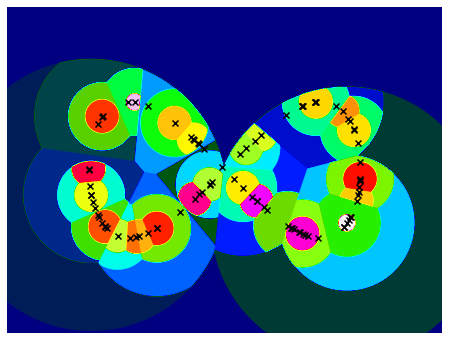

In [14]:
graph_partition(4, resolution)
